3) Gerando Séries Temporais e Modelos preditivos para todos os camundongos/linhagens isogênicos e heterogênicos.

In [54]:
#Importando bibliotecas necessárias para a análise.

import matplotlib.pyplot as plt #visualização de gráfico
import pandas as pd  #AED
import os            #acesso as pastas    
import seaborn as sns #visualização de gráfico
import numpy as np    #AED
from statsmodels.tsa.arima_model import ARIMA #modelo preditivo
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #parametros do modelo
from statsmodels.tsa.stattools import adfuller #descobrir pra que serve


#Paramentros para os gráficos
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 20 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 20 #tamanho da fonte

In [2]:
#Filtros para trabalhar com os dados da minha dataframe original

nume_ani = pd.read_csv('../../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
nume_ani = nume_ani[(nume_ani['num_ani'] < 200) 
                    & (nume_ani['util'] == 'nasc')
                    & (nume_ani['ling'] != 'Test')]
 #descarte[(descarte['obs_desc'] != 'AAA')
                   


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    nume_ani[d] = pd.to_datetime(nume_ani[d], unit = 's')
nume_ani.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [3]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

nume_ani['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

nume_ani['ling'].replace(' S129KO', 'S129KO', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

nume_ani['ling'].replace(['C57BL06WT','C57BL06WT\t'], 'C57BL/6', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

nume_ani['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

nume_ani['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

nume_ani['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

nume_ani['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

nume_ani['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

nume_ani['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)

In [4]:
nume_ani['ling'].value_counts()

Balb/c       498
C57BL/6      460
S129KO       250
129/SV-E     149
C3H          102
Swiss-1 A     48
Swiss-1 E     47
Swiss-1 C     38
Swiss-1 B     36
Swiss-1 D     33
Swiss-2 C     27
Swiss-2 B     24
DBA/1J        24
Swiss-2 E     21
Swiss-2 A     21
Swiss-2 D     21
AG129          9
Name: ling, dtype: int64

In [5]:
#Criando uma nova Dataframe, filtrando os valores discrepantes
q1 = nume_ani['num_ani'].quantile(0.25) #filtro para a retirada dos valores discrepantes
q3 = nume_ani['num_ani'].quantile(0.75)
iqr = q3 - q1

sem_out = nume_ani[(nume_ani['num_ani'] > (q1 - 1.5 * iqr)) & (nume_ani['num_ani'] < (q3 + 1.5 * iqr))]#dataframe
sem_out.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss-1 E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
122,2014-09-23 18:13:24,Tania,Swiss-1 D,10,AAA,1970-01-01 00:11:06,58,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:26:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA
123,2014-09-23 18:13:24,Tania,Swiss-1 B,10,AAA,1970-01-01 00:11:06,60,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:38:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA


In [6]:
ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129']

g_iso = sem_out[sem_out['ling'].isin(ling_iso)].groupby('ling')
linhagens_iso = g_iso.mean()
linhagens_iso

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,5.986486,666.0,666.0,666.0,666.0,666.0,666.0,1.040541,1.520270,5.986486,545.128378,482.216216,666.0,666.0
AG129,4.777778,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.000000,4.777778,592.444444,444.777778,666.0,666.0
Balb/c,7.488069,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.592191,7.488069,507.774403,476.221258,666.0,666.0
C3H,5.911765,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.166667,5.911765,529.441176,529.372549,666.0,666.0
C57BL/6,8.020316,666.0,666.0,666.0,666.0,666.0,666.0,1.004515,1.677201,8.020316,562.851016,504.492099,666.0,666.0
DBA/1J,9.583333,666.0,666.0,666.0,666.0,666.0,666.0,1.000000,1.958333,9.583333,666.000000,666.000000,666.0,666.0
S129KO,6.198381,666.0,666.0,666.0,666.0,666.0,666.0,1.008097,1.684211,6.198381,537.202429,545.190283,666.0,666.0


In [7]:
ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 B','Swiss-2 C','Swiss-2 D','Swiss-2 E']  

g_het = sem_out[sem_out['ling'].isin(ling_het)].groupby('ling')
linhagens_het = g_het.mean()
linhagens_het

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
Swiss-1 A,10.130435,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.217391,10.130435,579.565217,594.021739,666.0,666.0
Swiss-1 B,10.085714,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.314286,10.085714,552.428571,552.400000,666.0,666.0
Swiss-1 C,9.500000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.352941,9.500000,529.558824,568.676471,666.0,666.0
Swiss-1 D,10.090909,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.393939,10.090909,525.515152,605.727273,666.0,666.0
Swiss-1 E,9.585366,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.365854,9.585366,617.585366,552.951220,666.0,666.0
Swiss-2 A,10.761905,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.047619,10.761905,602.809524,539.714286,666.0,666.0
Swiss-2 B,10.500000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.000000,10.500000,583.125000,500.125000,666.0,666.0
Swiss-2 C,9.851852,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.185185,9.851852,616.962963,518.592593,666.0,666.0
Swiss-2 D,10.250000,666.0,666.0,666.0,666.0,666.0,666.0,1.0,1.000000,10.250000,500.300000,599.850000,666.0,666.0


In [8]:
#Criando um Dataframe pra plotar minhas séries temporais:

serie_temp_ling = pd.DataFrame(sem_out['date_hoje'])
serie_temp_ling['ling'] = sem_out['ling'] #criação da DataFrame "tirar_ling com a coluna de data"
serie_temp_ling['num_ani'] = sem_out['num_ani']#criação de coluna(serie_temp) que estará inserida na DataFrame
serie_temp_ling = serie_temp_ling.set_index('date_hoje') #identificando a nova coluna como index data_hoje
serie_temp_ling.head()

,ling,num_ani
date_hoje,,
2014-09-23 17:40:33,Swiss-1 E,5
2014-09-23 17:40:33,Swiss-1 E,10
2014-09-23 17:40:47,Swiss-1 E,10
2014-09-23 18:13:24,Swiss-1 D,10
2014-09-23 18:13:24,Swiss-1 B,10


In [9]:
#Salvando minha DataFrame em csv para exportar e trabalhar em outro arquivo.
# serie_temp_ling.to_csv('../tabelas_test/serie_temp_ling.csv')

/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)


<AxesSubplot:xlabel='date_hoje'>

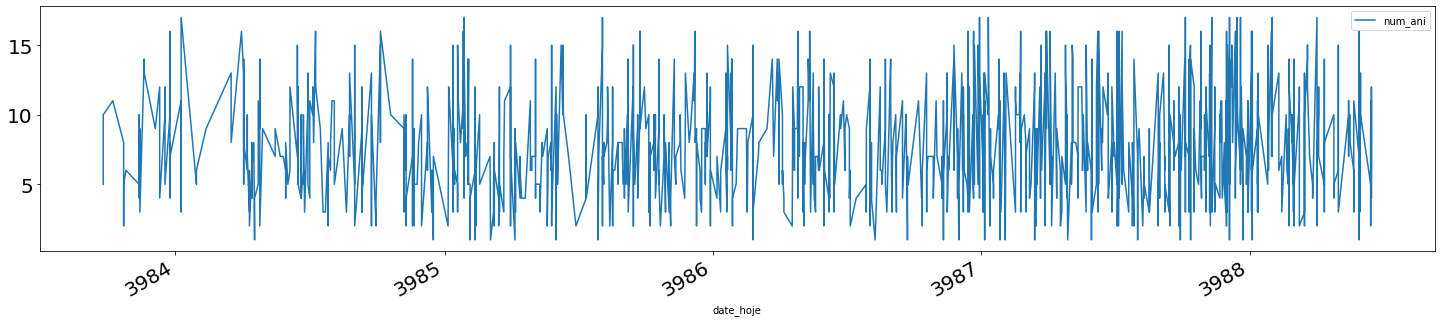

In [10]:
#Plotando numero de animais produzidos por ano.
serie_temp_ling.plot(

figsize=(25,5)
)


In [11]:
#Biblioteca com funções para trabalhar series temporais.
from statsmodels.tsa.seasonal import seasonal_decompose

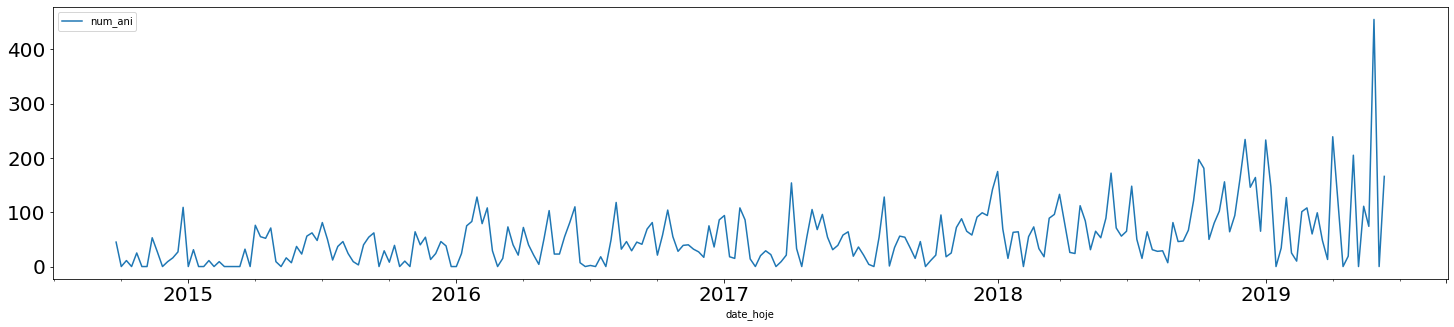

In [12]:
semana = serie_temp_ling.resample('W').sum().plot(
figsize=(25, 5)
)

<AxesSubplot:xlabel='date_hoje'>

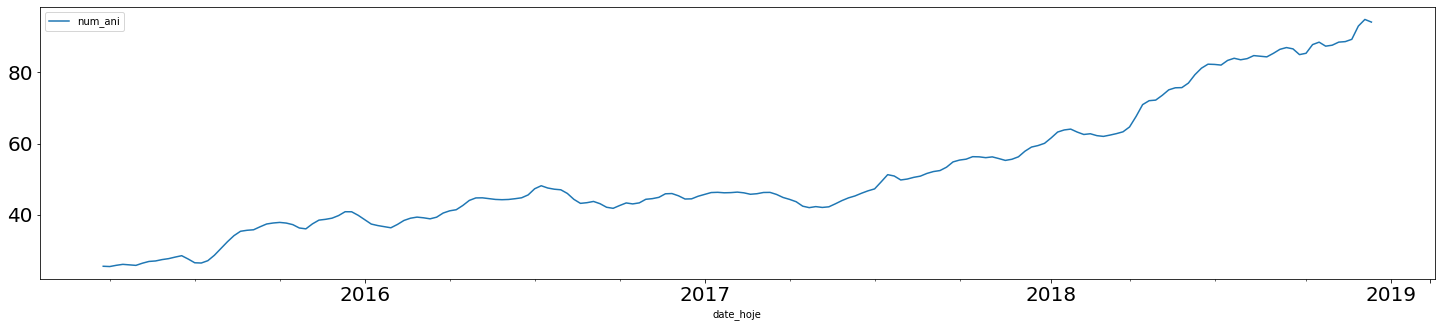

In [13]:
#Plotando minha tendência
semana = serie_temp_ling.resample('W').sum()
dec = seasonal_decompose(semana)
dec.trend.plot(
        figsize=(25, 5)
)

In [14]:
# dec.seasonal.plot(
#         figsize=(25, 5)
# )

In [15]:
# dec.resid.plot(
#         figsize=(25, 5)
# )

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [16]:
tempo_mes = serie_temp_ling.resample('M').sum()
tempo_mes.head()

,num_ani
date_hoje,
2014-09-30,45
2014-10-31,36
2014-11-30,80
2014-12-31,161
2015-01-31,42


In [17]:
temp_ano = serie_temp_ling.resample('A').sum()
temp_ano

,num_ani
date_hoje,
2014-12-31,322
2015-12-31,1378
2016-12-31,2507
2017-12-31,2482
2018-12-31,4239
2019-12-31,2395


In [18]:
temp_ano.mean()

num_ani    2220.5
dtype: float64

/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later

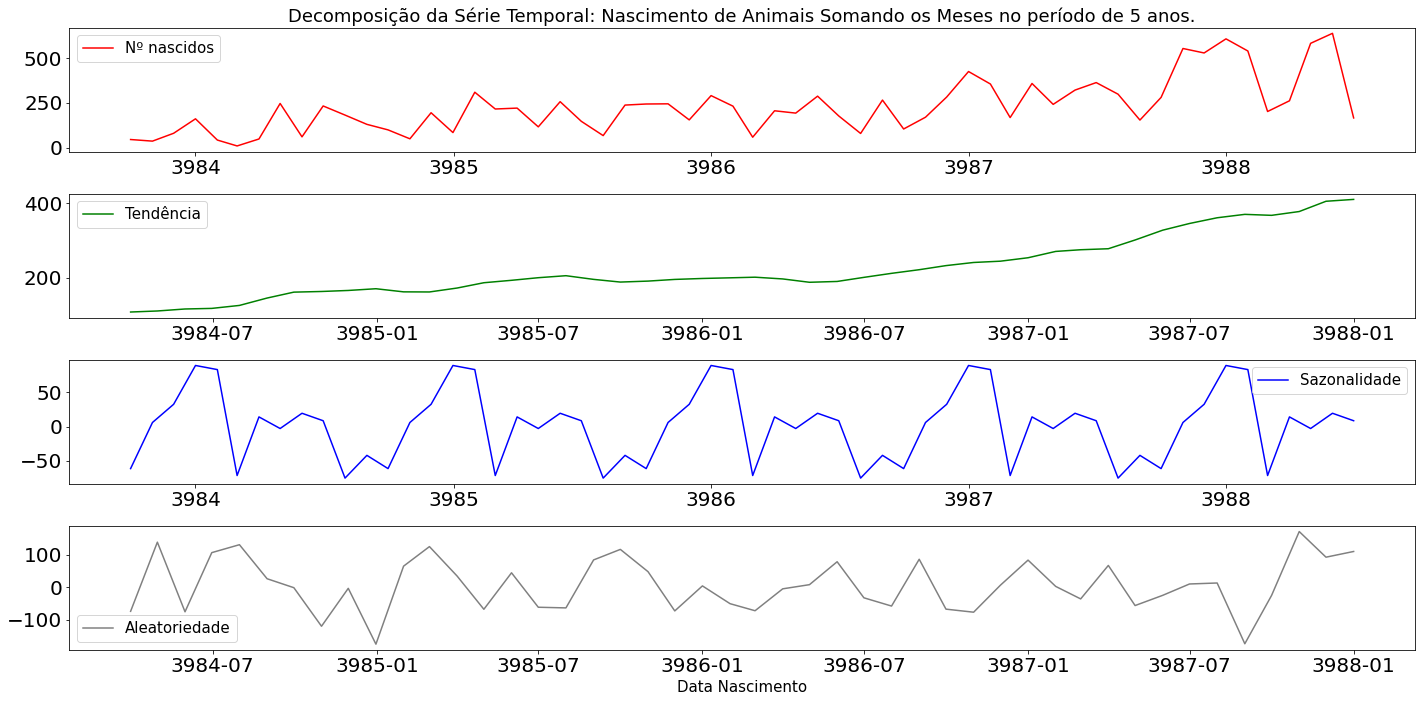

In [19]:
#1) Série temporal somando o numero de animais de todos os meses por ano

tempo_mes = serie_temp_ling.resample('M').sum().dropna()  #pegando minha série e pela função .resample() somando todos os meses entre os anos e .dropna()tirando valores NA
decom = seasonal_decompose(tempo_mes, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.figure(figsize=(20, 10))

plt.subplot(4, 1, 1)
plt.plot(tempo_mes, label = 'Nº nascidos', color='red')
plt.rcParams.update({'font.size': 15}) #tamanho da fonte

plt.title('Decomposição da Série Temporal: Nascimento de Animais Somando os Meses no período de 5 anos.') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/17-serietemporal_somandomeses.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [20]:
#Salvando minha DataFrame em csv para exportar e trabalhar em outro arquivo.

# tempo_mes.to_csv('../tabelas_test/test_tempo_mes.csv')

In [21]:
tempo_semana = serie_temp_ling.resample('W').sum().dropna()
tempo_semana.head()

,num_ani
date_hoje,
2014-09-28,45
2014-10-05,0
2014-10-12,11
2014-10-19,0
2014-10-26,25


/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later

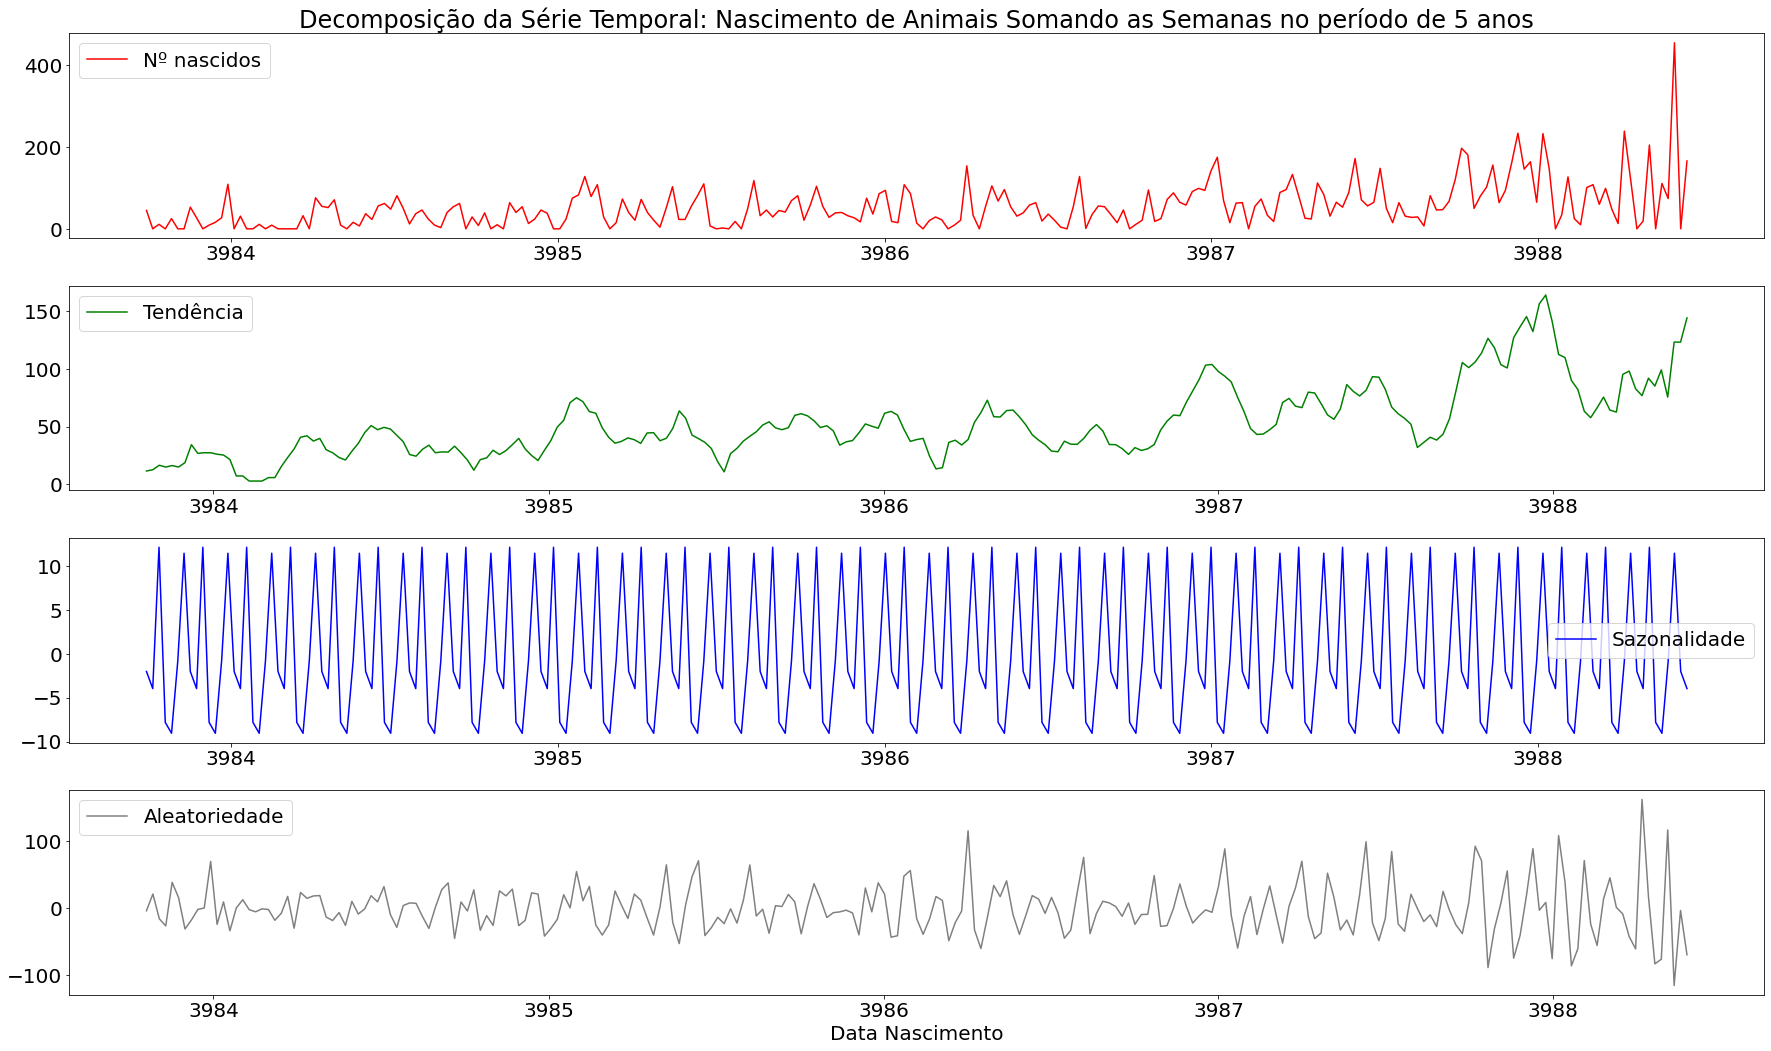

In [23]:
#2) Série temporal somando o numero de animais de todas as semanas por ano
tempo_semana = serie_temp_ling.resample('W').sum().dropna()
decom = seasonal_decompose(tempo_semana, freq=7)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_semana, label = 'Nº nascidos', color='red')
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Decomposição da Série Temporal: Nascimento de Animais Somando as Semanas no período de 5 anos') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
# plt.savefig(
#     fname="../resultados/17-serietemporal_somandosemanas.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

In [24]:
# tempo_semana.to_csv('../tabelas_test/test_tempo_semana.csv')

GRUPO ISOGÊNICO

In [25]:
#Nova DataFrame filtranso apenas as linhagens isogênicas a partir da serie_temp_ling

ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129']

serie_lings_i = serie_temp_ling[serie_temp_ling['ling'].isin(ling_iso)]
serie_lings_i.head()

,ling,num_ani
date_hoje,,
2014-10-21 12:43:17,129/SV-E,8
2014-10-21 12:43:17,129/SV-E,2
2014-10-21 12:43:17,129/SV-E,4
2014-10-21 13:02:34,S129KO,5
2014-10-24 15:47:48,S129KO,6


/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later

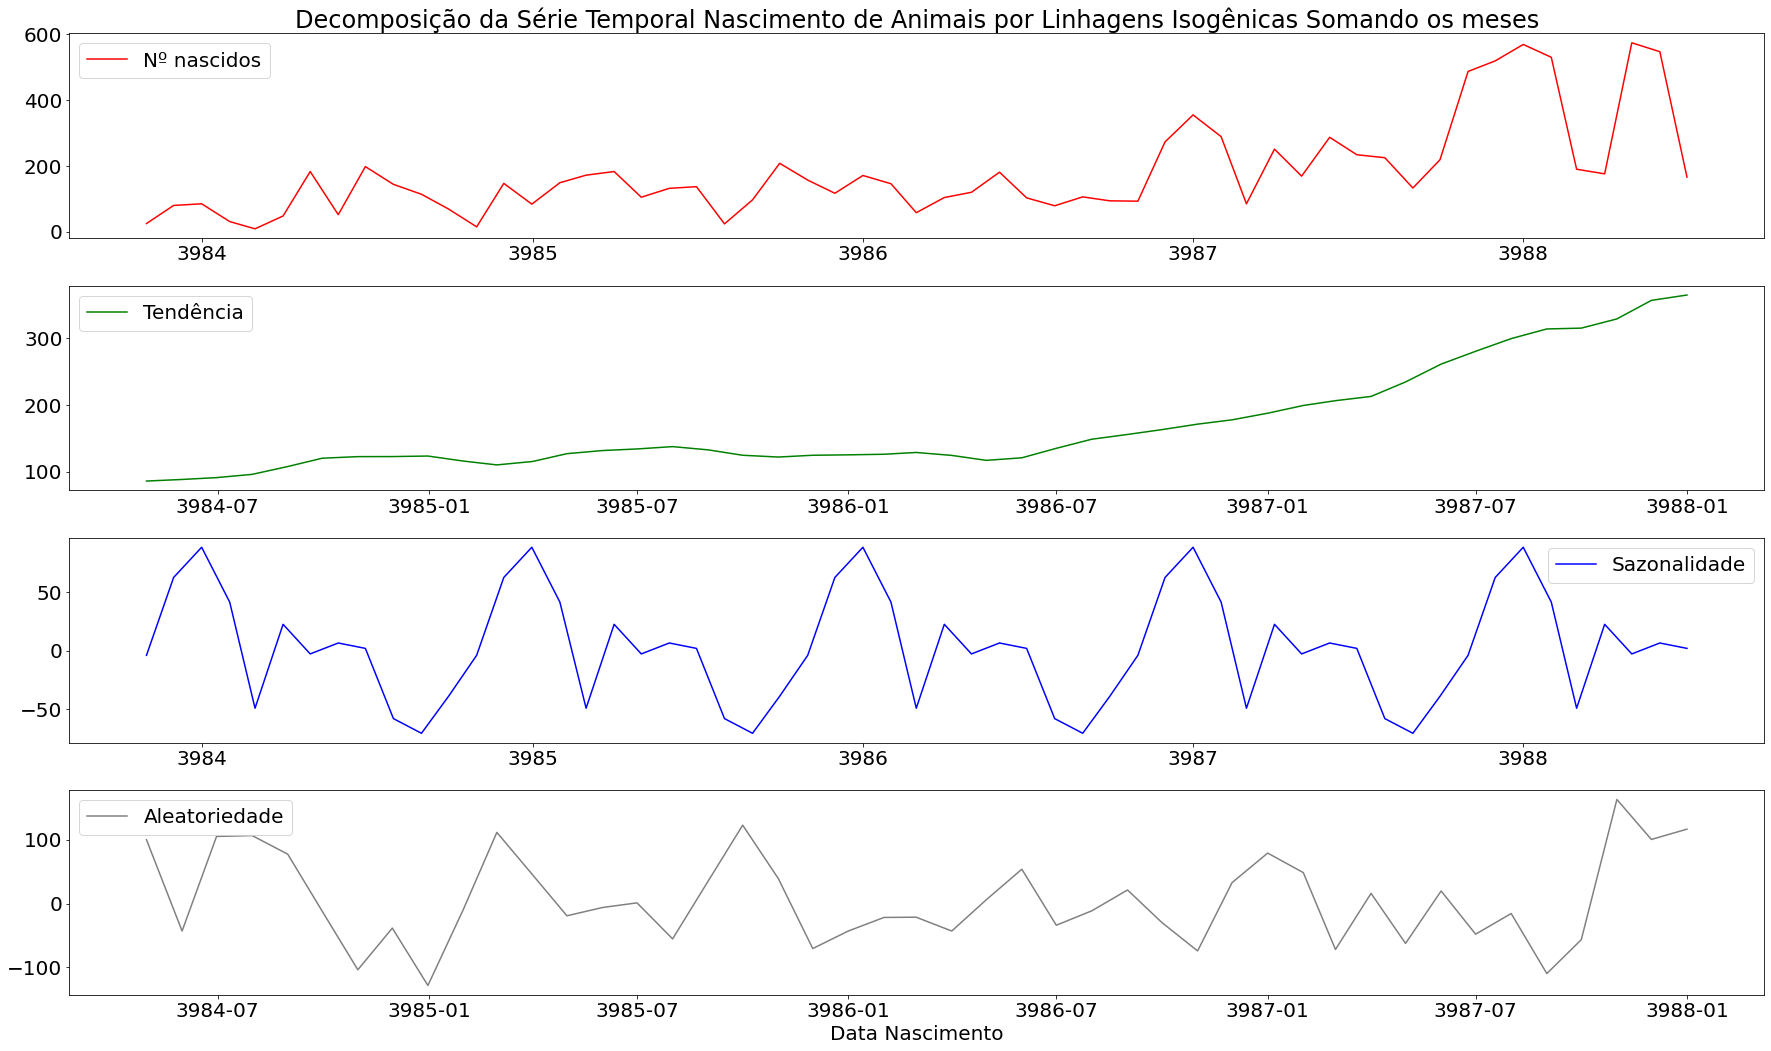

In [26]:
#3) Série temporal somando o numero de animais por linhagem isogênicas de todos os meses por ano
tempo_mes_iso = serie_lings_i.resample('M').sum().dropna()
decom = seasonal_decompose(tempo_mes_iso, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_mes_iso, label = 'Nº nascidos', color='red')
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Decomposição da Série Temporal Nascimento de Animais por Linhagens Isogênicas Somando os meses') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/17-serietemporal_somandomeses_iso.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later

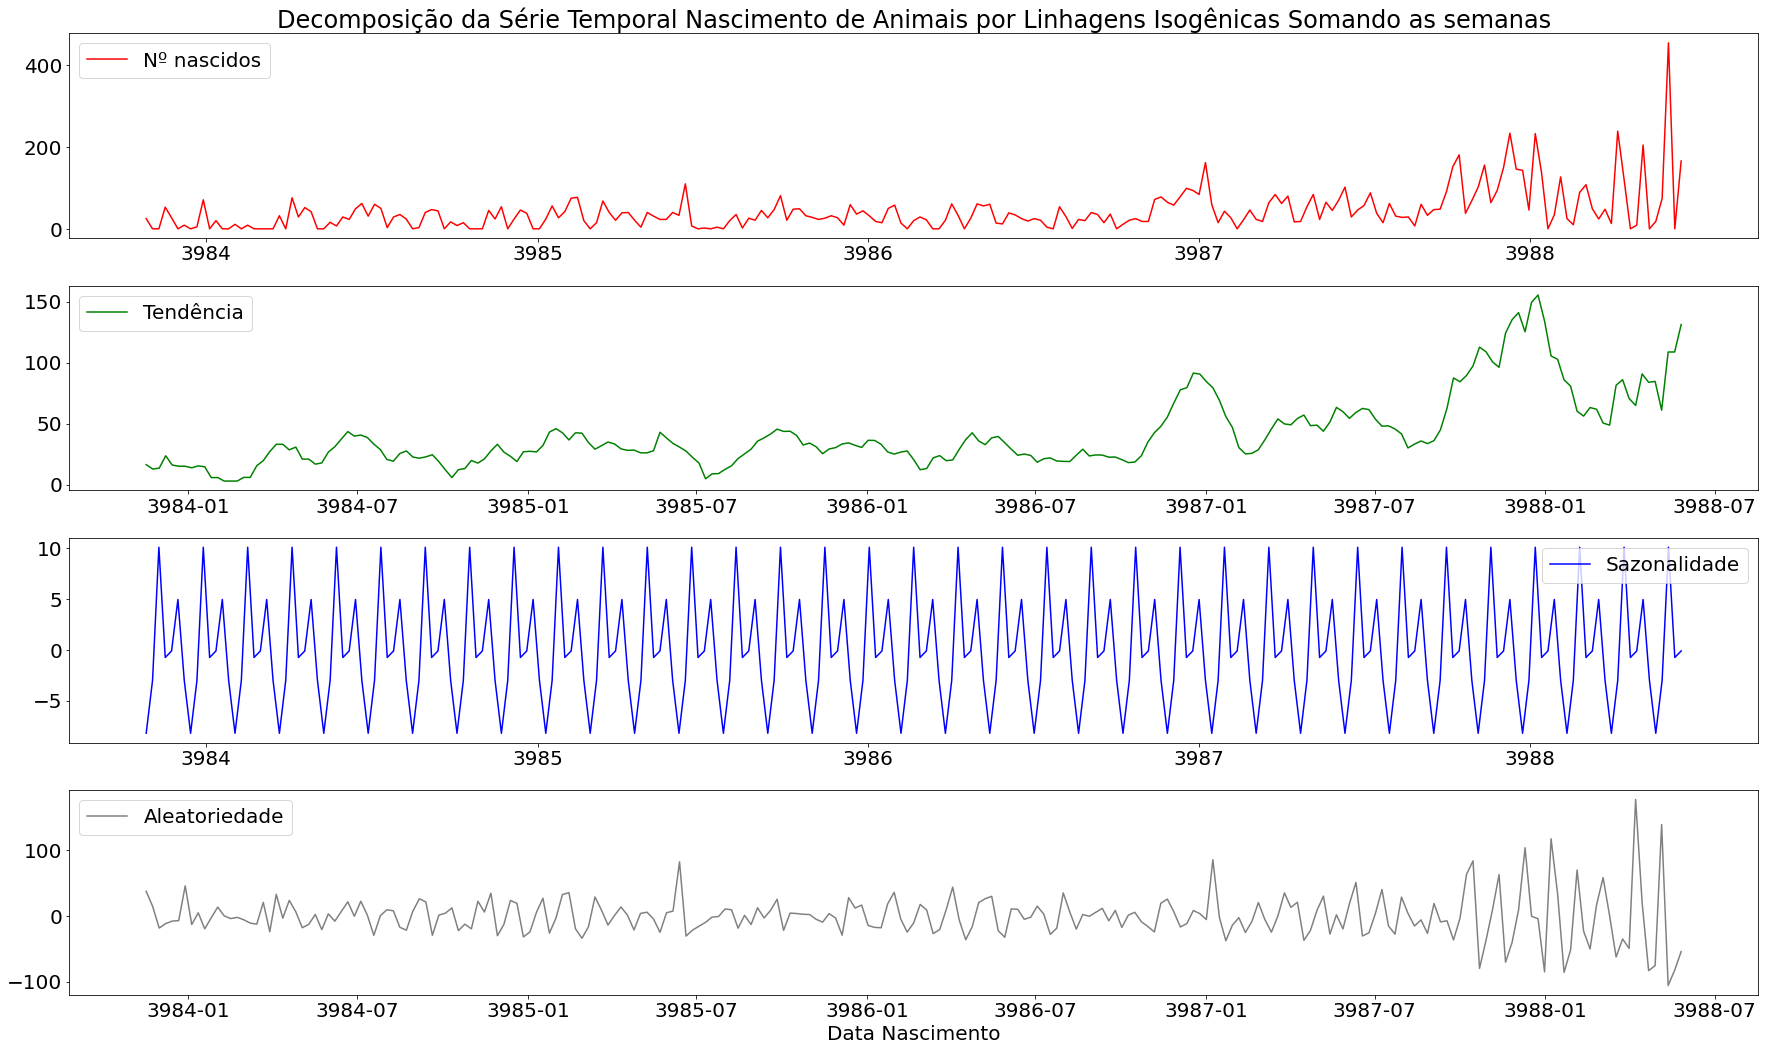

In [29]:
# 4) Série temporal somando o numero de animais por linhagem isogênica de todas as semanas por ano

tempo_semana_iso = serie_lings_i.resample('W').sum().dropna()
decom = seasonal_decompose(tempo_semana_iso, freq=7)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_semana_iso, label = 'Nº nascidos', color='red')
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Decomposição da Série Temporal Nascimento de Animais por Linhagens Isogênicas Somando as semanas') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/17-serietemporal_somandosemanas_iso.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

GRUPO HETEROGÊNICO

In [30]:
ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 B','Swiss-2 C','Swiss-2 D','Swiss-2 E']
serie_lings_h = serie_temp_ling[serie_temp_ling['ling'].isin(ling_het)]
serie_lings_h.head()

,ling,num_ani
date_hoje,,
2014-09-23 17:40:33,Swiss-1 E,5
2014-09-23 17:40:33,Swiss-1 E,10
2014-09-23 17:40:47,Swiss-1 E,10
2014-09-23 18:13:24,Swiss-1 D,10
2014-09-23 18:13:24,Swiss-1 B,10


/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later

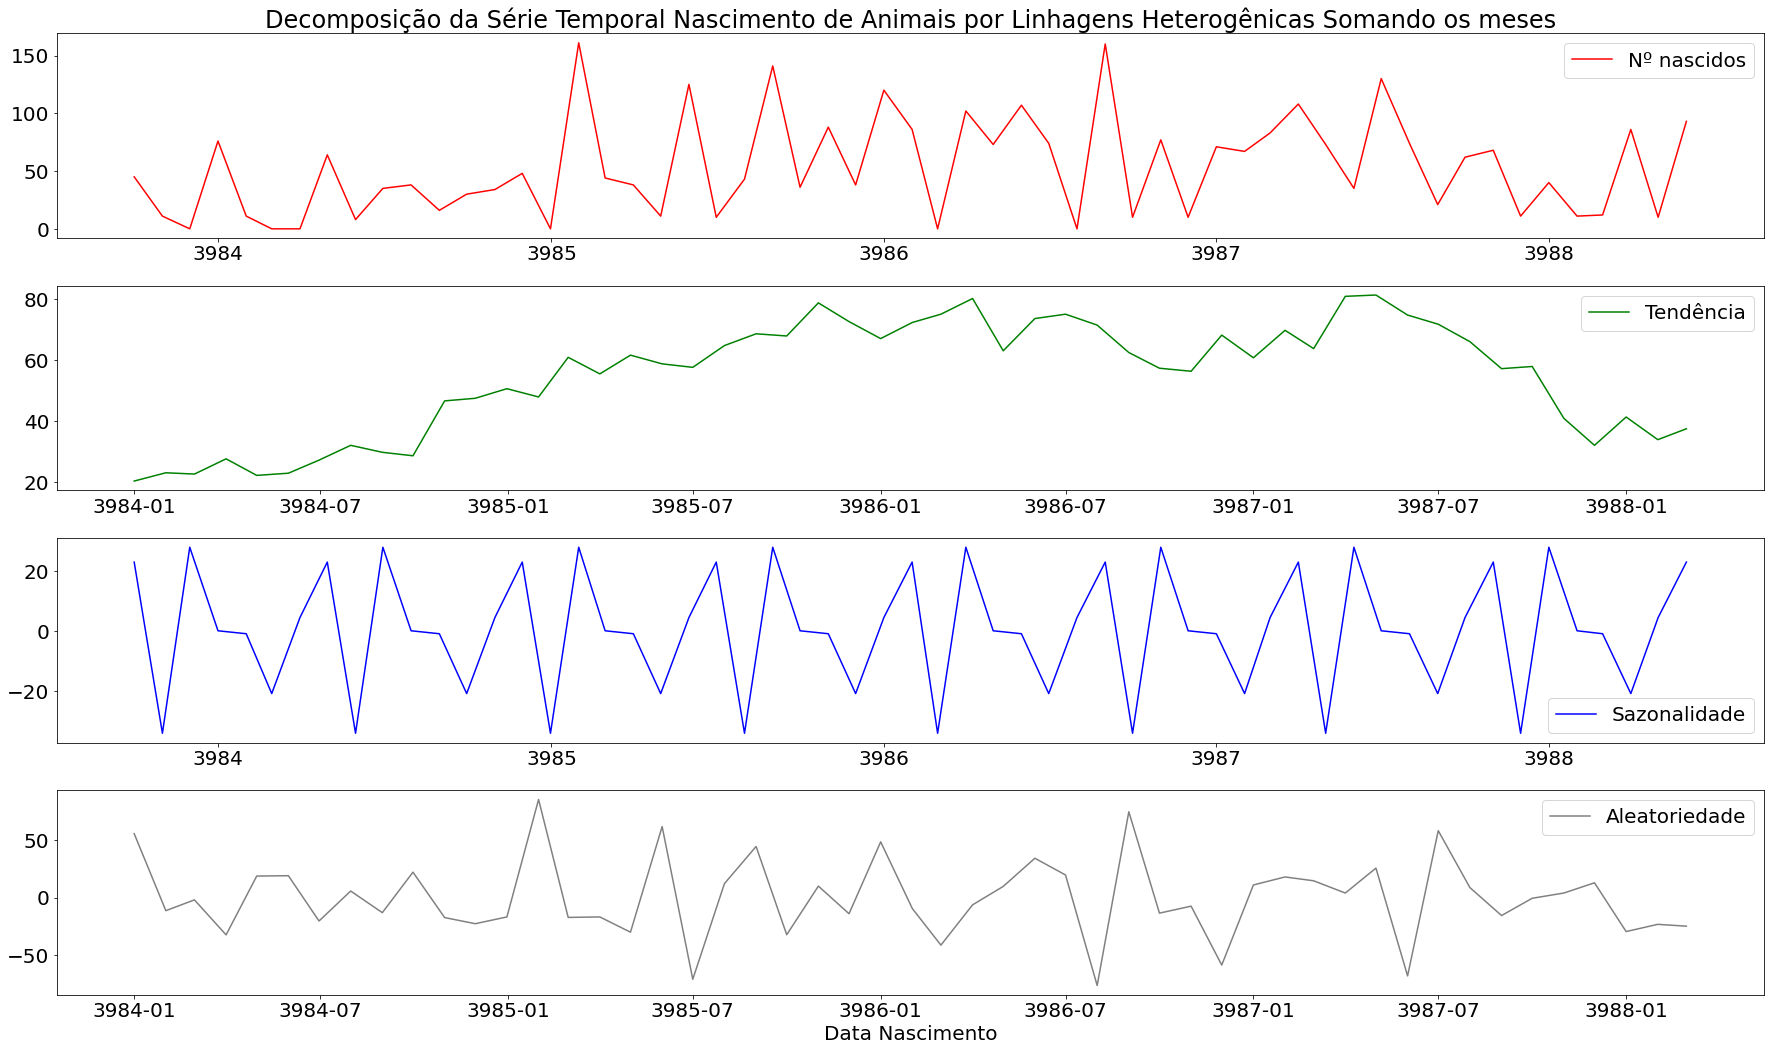

In [31]:
# 5) Série temporal somando o numero de animais por linhagem heterogênica de todos os meses por ano
tempo_mes_het = serie_lings_h.resample('M').sum().dropna()

decom = seasonal_decompose(tempo_mes_het, freq=7)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_mes_het, label = 'Nº nascidos', color='red')
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Decomposição da Série Temporal Nascimento de Animais por Linhagens Heterogênicas Somando os meses') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/17-serietemporal_somandomeses_het.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)
/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later

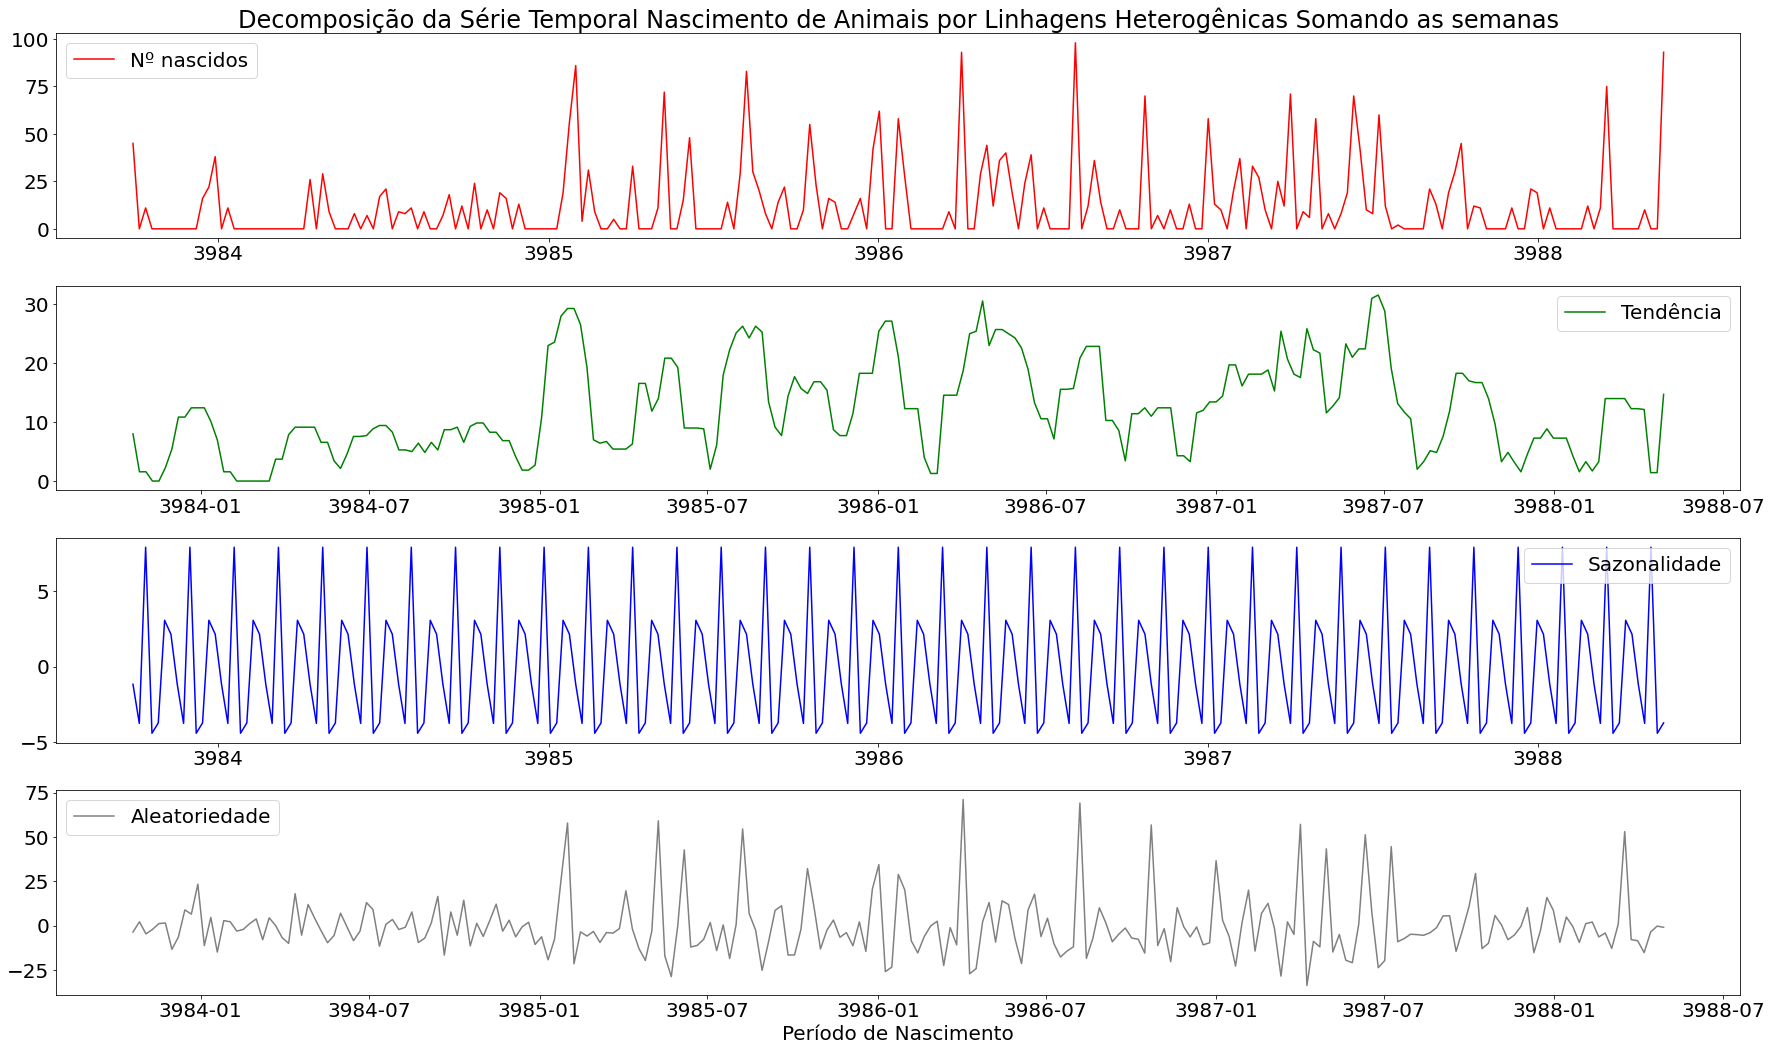

In [32]:
# 6) Série temporal somando o numero de animais por linhagem heterogênica de todas as semanas por ano
tempo_semana_het = serie_lings_h.resample('W').sum().dropna()
decom = seasonal_decompose(tempo_semana_het, freq=7)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(tempo_semana_het, label = 'Nº nascidos', color='red')
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Decomposição da Série Temporal Nascimento de Animais por Linhagens Heterogênicas Somando as semanas') 
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Período de Nascimento')
plt.tight_layout()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/17-serietemporal_somandosemanas_het.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [33]:
serie_temp_ling.head()

,ling,num_ani
date_hoje,,
2014-09-23 17:40:33,Swiss-1 E,5
2014-09-23 17:40:33,Swiss-1 E,10
2014-09-23 17:40:47,Swiss-1 E,10
2014-09-23 18:13:24,Swiss-1 D,10
2014-09-23 18:13:24,Swiss-1 B,10


In [34]:
test_dia = serie_temp_ling.groupby('ling')
test_dia_resul = test_dia.resample('D').sum().dropna()
test_dia_resul.head()

num_ani
ling     date_hoje          
129/SV-E 2014-10-21       14
         2014-10-22        0
         2014-10-23        0
         2014-10-24        0
         2014-10-25        0

In [36]:
serie_temp_ling.head()

,ling,num_ani
date_hoje,,
2014-09-23 17:40:33,Swiss-1 E,5
2014-09-23 17:40:33,Swiss-1 E,10
2014-09-23 17:40:47,Swiss-1 E,10
2014-09-23 18:13:24,Swiss-1 D,10
2014-09-23 18:13:24,Swiss-1 B,10


In [38]:

fonte = 12
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

In [69]:
df = serie_lings_h['num_ani']

df_adf_test = df.diff().diff().diff().dropna()
result = adfuller(df_adf_test)

print(f'ADF: {round(result[0], 2)}%')
print(f'p-value: {round(result[1])}%')


ADF: -11.47%
p-value: 0.0%


In [73]:
df = serie_temp_ling['num_ani']

df_adf_test = df.diff().dropna()
df_adf_test = df.diff().diff().dropna()



In [74]:
serie_test = pd.DataFrame(nume_ani['date_hoje'])
serie_test['ling'] = nume_ani['ling'] #criação da DataFrame "tirar_ling com a coluna de data"
serie_test['num_ani'] = nume_ani['num_ani']#criação de coluna(serie_temp) que estará inserida na DataFrame
serie_test = serie_test.set_index('date_hoje') #identificando a nova coluna como index data_hoje
serie_test.head()

,ling,num_ani
date_hoje,,
2014-09-23 17:40:33,Swiss-1 E,5
2014-09-23 17:40:33,Swiss-1 E,10
2014-09-23 17:40:33,Swiss-1 C,20
2014-09-23 17:40:47,Swiss-1 E,10
2014-09-23 17:40:47,Swiss-1 E,20


In [77]:
df_test = serie_test['num_ani']

df_adf_test_t = df_test.diff().dropna()
result_t = adfuller(df_adf_test_t)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -11.473423
p-value: 0.000000


/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:284: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)


(array([735233.00000116, 735598.00000116, 735964.00000116, 736329.00000116,
        736694.00000116, 737059.00000116]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

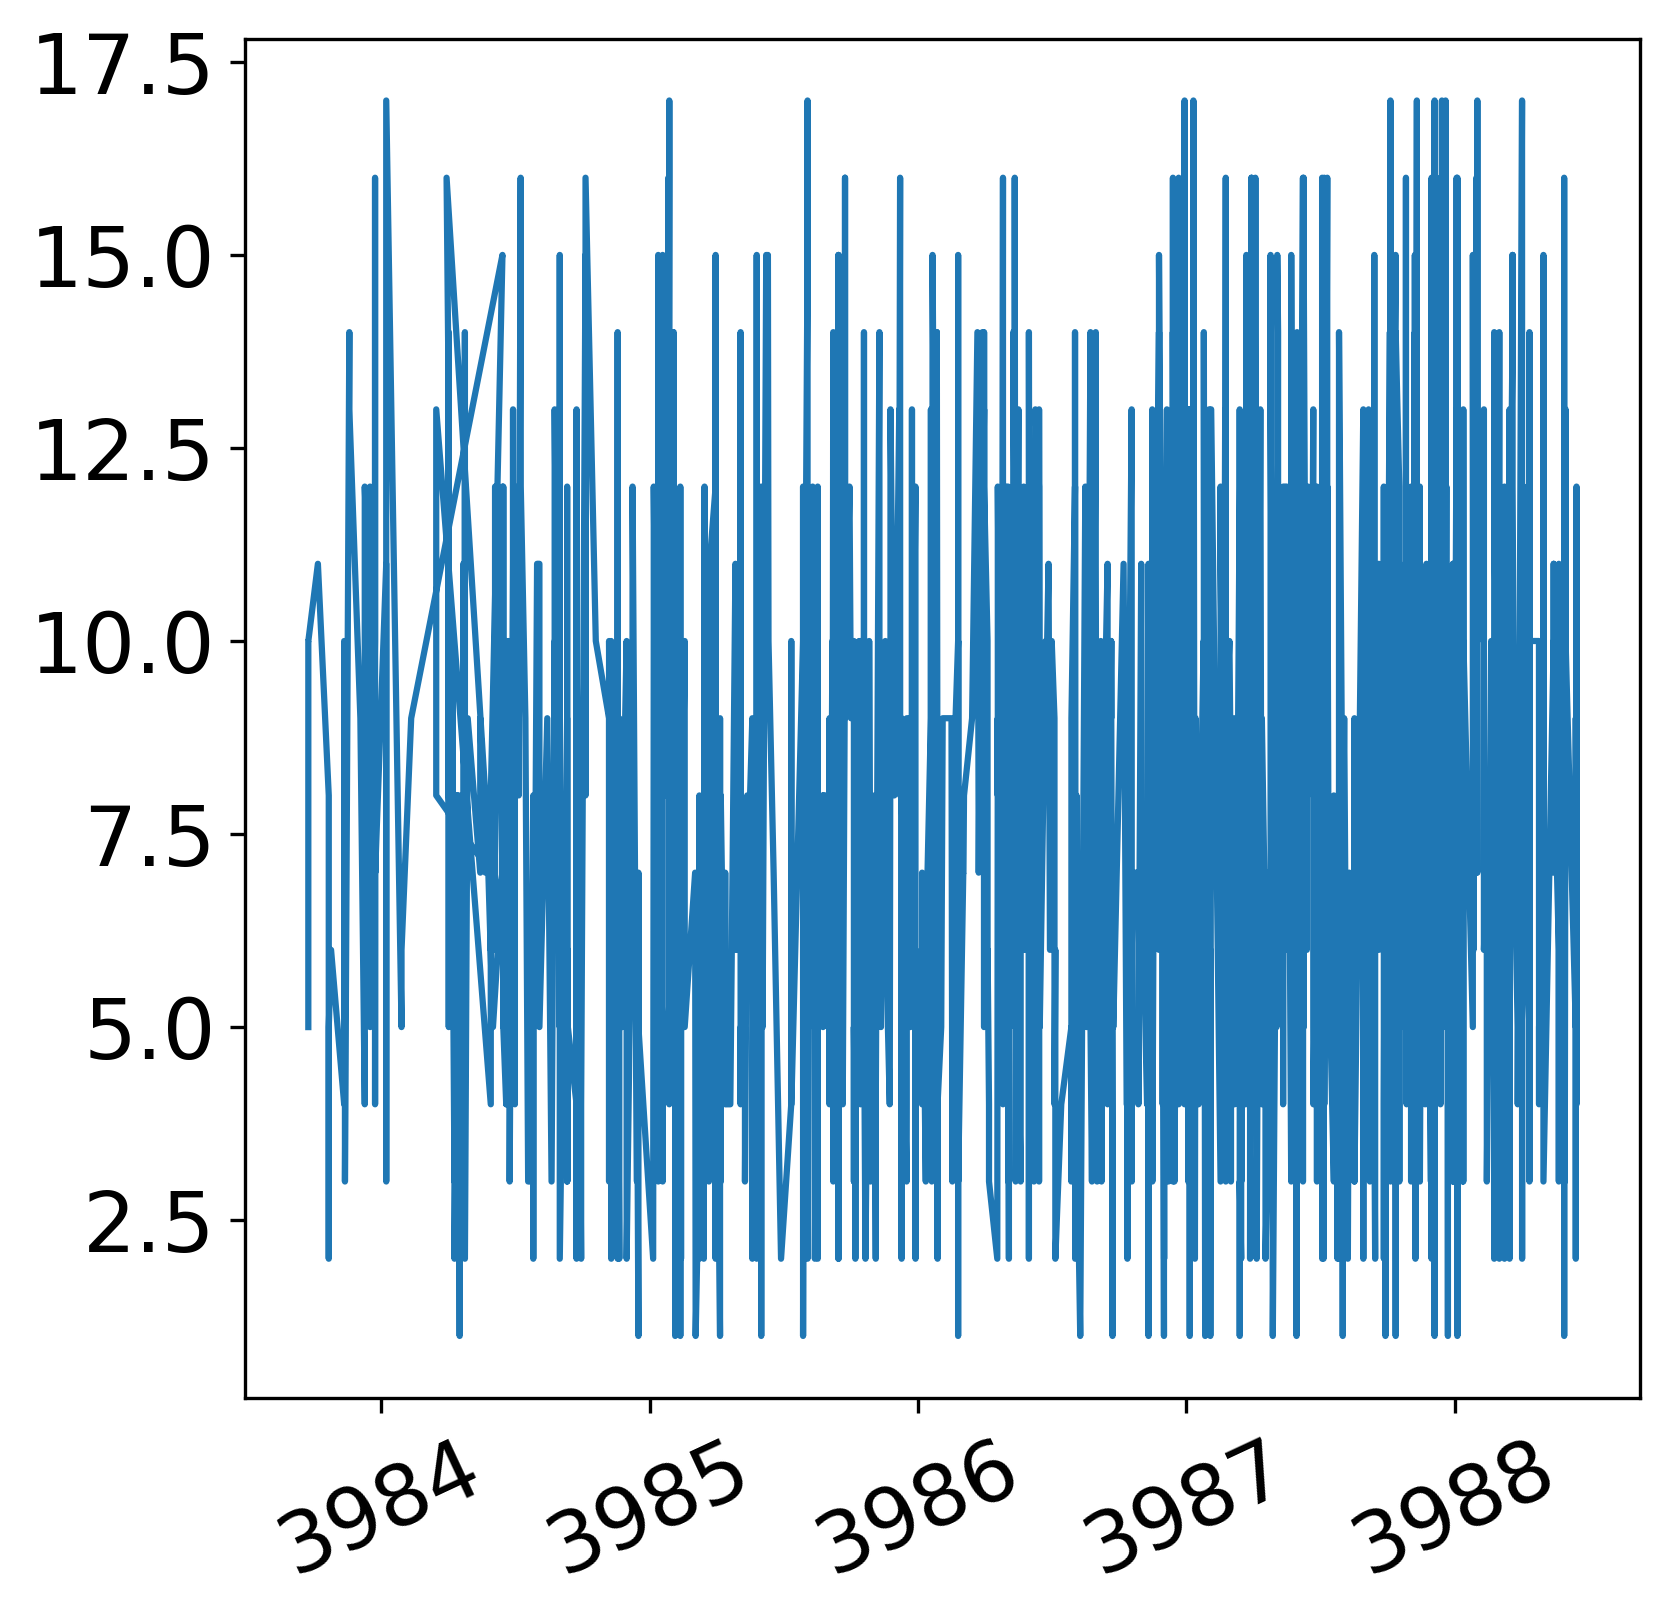

In [51]:
size_fig = (6,6)
plt.figure(figsize=size_fig)
plt.plot(serie_temp_ling['num_ani'])
plt.xticks(rotation=25)

++++++++++++++++++++++++++ PLOTANDO AS PREVISÕES +++++++++++++++++++++++++++++

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
serie_temp_ling.index.max()

In [ ]:
                                                      #Testando a função .resample() que soma todos os animais por meses durante cada ano.
ts = serie_temp_ling.resample('M').sum()               #somando mês a mês
ts = ts['num_ani']                                     #para trabalhar com a previsão deve usar uma série, na qual foi escolhida 'num_ani'
ts.head()                                              #verificando se funciona

Testando os parâmetros para o modelo preditivo

In [ ]:
for p in range(3):                                    #laço com tamanho 3 para p
    for q in range(3):                                #laço com tamanho 3 para q
        for d in range(3):                            #laço com tamanho 3 para d
            test = (p, q, d)                          #guardando p,q,d em uma variável
            modelo = ARIMA(ts, order=test, freq='M')  #modelo ARIMA
            try:                                      #tente
                results = modelo.fit()                #usando a função fit
                print(f'({p}, {q}, {d})')             #printando os valores ajustados
                print(results.summary())              #resumo dos parâmetros
                print()
            except: 
                print('Não')

In [ ]:
teste = ARIMA(ts, order=(0, 1, 2))                  # dentro de order temos (p, q, d) p n° de termos auto regressivos, q n° da média móvel (muveing average), d n° de diferenças ñ sazonais
modelo_tr = teste.fit()                             #ajusta o modelo ARIMA (p, d, q)
modelo_tr.summary()                                 #diagnosticar o pré-ajuste e o modelo ARIMA


In [ ]:
#previsão somando todas as linhagens mês a mês

prev = modelo_tr.forecast(steps=12)                                            #que irá te retornar a previsão para o período definido, que pode ser dias, meses, anos,
plt.figure(figsize=(25, 5))
modelo_tr.plot_predict('2018-06', '2020-06',                                   #decedindo o período de previsão
                       ax = ts.plot(),
                       plot_insample=True
                      )
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Ajuste Modelo ARIMA(0,1,2) Previsão para dois anos')

plt.xlabel('Períodos') #definindo nome do eixo X
plt.ylabel('Número de Animais') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-previsao_meses.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [ ]:
prev[0] #Valores guardados nessa variável.

GRUPO ISOGÊNICO

In [ ]:
#previsão para grupo isogênico.

ts_iso = serie_lings_i.resample('M').sum()
ts_iso = ts_iso['num_ani']
ts_iso.head()

Testando os parametros pro ajuste do modelo preditivo para o grupo isogênico

In [ ]:
for p in range(3):                                    #laço com tamanho 3 para p
    for q in range(3):                                #laço com tamanho 3 para q
        for d in range(3):                            #laço com tamanho 3 para d
            test = (p, q, d)                          #guardando p,q,d em uma variável
            modelo = ARIMA(ts_iso, order=test, freq='M')  #modelo ARIMA
            try:                                      #tente
                results = modelo.fit()                #usando a função fit
                print(f'({p}, {q}, {d})')             #printando os valores ajustados
                print(results.summary())              #resumo dos parâmetros
                print()
            except: 
                print('Não')

In [ ]:
#verificando os resultados para previsão.

teste_iso = ARIMA(ts_iso, order=(3, 1, 2)) # dentro de order temos (p, q, d) p n° de termos auto regressivos, q n° da média móvel (muveing average), d n° de diferenças ñ sazonais
modelo_iso = teste_iso.fit()
modelo_iso.summary()

In [ ]:
#previsão somando grupo isogênico mês a mês

prev = modelo_iso.forecast(steps=12)

plt.figure(figsize=(25, 5))
modelo_iso.plot_predict('2018-06', '2020-06',
                       ax = ts_iso.plot(),
                       plot_insample=True
                      )
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Ajuste Modelo ARIMA(3,1,2) Previsão para dois anos: Isogênico')
plt.xlabel('Períodos') #definindo nome do eixo X
plt.ylabel('Número de Animais') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-previsao_meses_iso.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

GRUPO HETEROGÊNICO

In [ ]:
ts_het = serie_lings_h.resample('M').sum()
ts_het = ts_het['num_ani']
ts_het.head()

Testando os parametros pro ajuste do modelo preditivo para o grupo heterogênico

In [ ]:
for p in range(3):                                    #laço com tamanho 3 para p
    for q in range(3):                                #laço com tamanho 3 para q
        for d in range(3):                            #laço com tamanho 3 para d
            test = (p, q, d)                          #guardando p,q,d em uma variável
            modelo = ARIMA(ts_het, order=test, freq='M')  #modelo ARIMA
            try:                                      #tente
                results = modelo.fit()                #usando a função fit
                print(f'({p}, {q}, {d})')             #printando os valores ajustados
                print(results.summary())              #resumo dos parâmetros
                print()
            except: 
                print('Não')

In [ ]:
teste_het = ARIMA(ts_het, order=(1, 2, 2)) # dentro de order temos (p, q, d) p n° de termos auto regressivos, q n° da média móvel (muveing average), d n° de diferenças ñ sazonais
modelo_het = teste_het.fit()
modelo_het.summary()

In [ ]:
#previsão somando grupo heterogênico mês a mês

prev = modelo_het.forecast(steps=12)

plt.figure(figsize=(25, 5))
modelo_het.plot_predict('2018-06', '2020-06',
                       ax = ts_het.plot(),
                       plot_insample=True
                      )
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Ajuste Modelo ARIMA(1,2,2) Previsão para dois anos: Heterogênico')
plt.xlabel('Períodos') #definindo nome do eixo X
plt.ylabel('Número de Animais') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../resultados/17-previsao_meses_het.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)